# Project 2 -- Ames Housing Project Suggestions

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV

from sklearn import metrics

%matplotlib inline

## Load the Data

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Data Cleaning

In [3]:
train.isnull().sum()
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [4]:
#Id is just a observation number, so we are going to exclude it.
train = train.loc[:,train.columns != 'Id']
#Separate numerical and categorical data
numerical = train.select_dtypes(exclude=['object'])
categorical = train.select_dtypes('object')



In [5]:
#numerical data
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0
BsmtFin SF 1,2050.0,4.423005e+02,4.612041e+02,0.0,0.0,368.0,7.337500e+02,5644.0


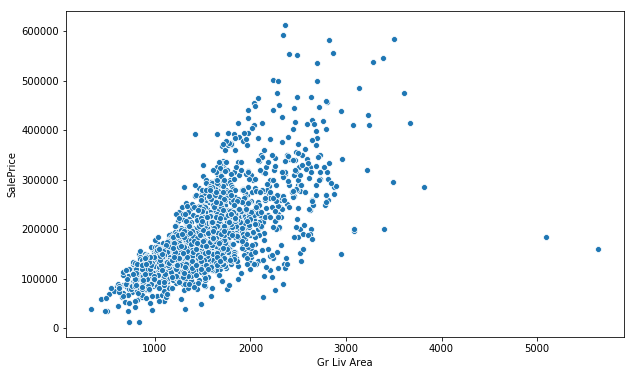

(2049, 80)

In [6]:
#Remove outliers
#scatterplot of SalePrice VS Gr Liv Area
plt.figure(figsize=(10,6))
sns.scatterplot(x=train['Gr Liv Area'], y = train.SalePrice)
plt.show()
#there are two outliers which bigger than 4000, we are going to remove them.
train = train[train['Gr Liv Area']<4000]
train.shape

## Exploratory data analysis for numerical features 

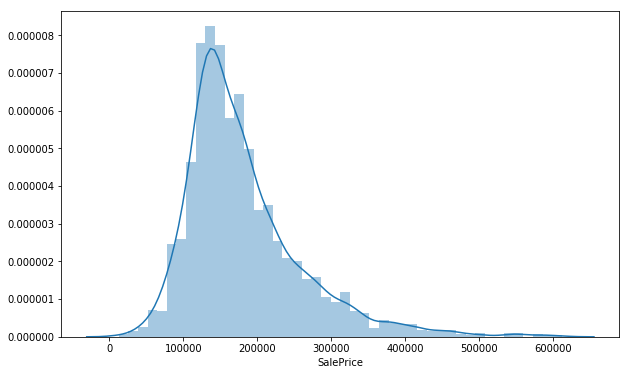

In [7]:
#plots for Sale Price
plt.figure(figsize=(10,6))
sns.distplot(train.SalePrice)
plt.show()

The plot of sale price is right skewed.

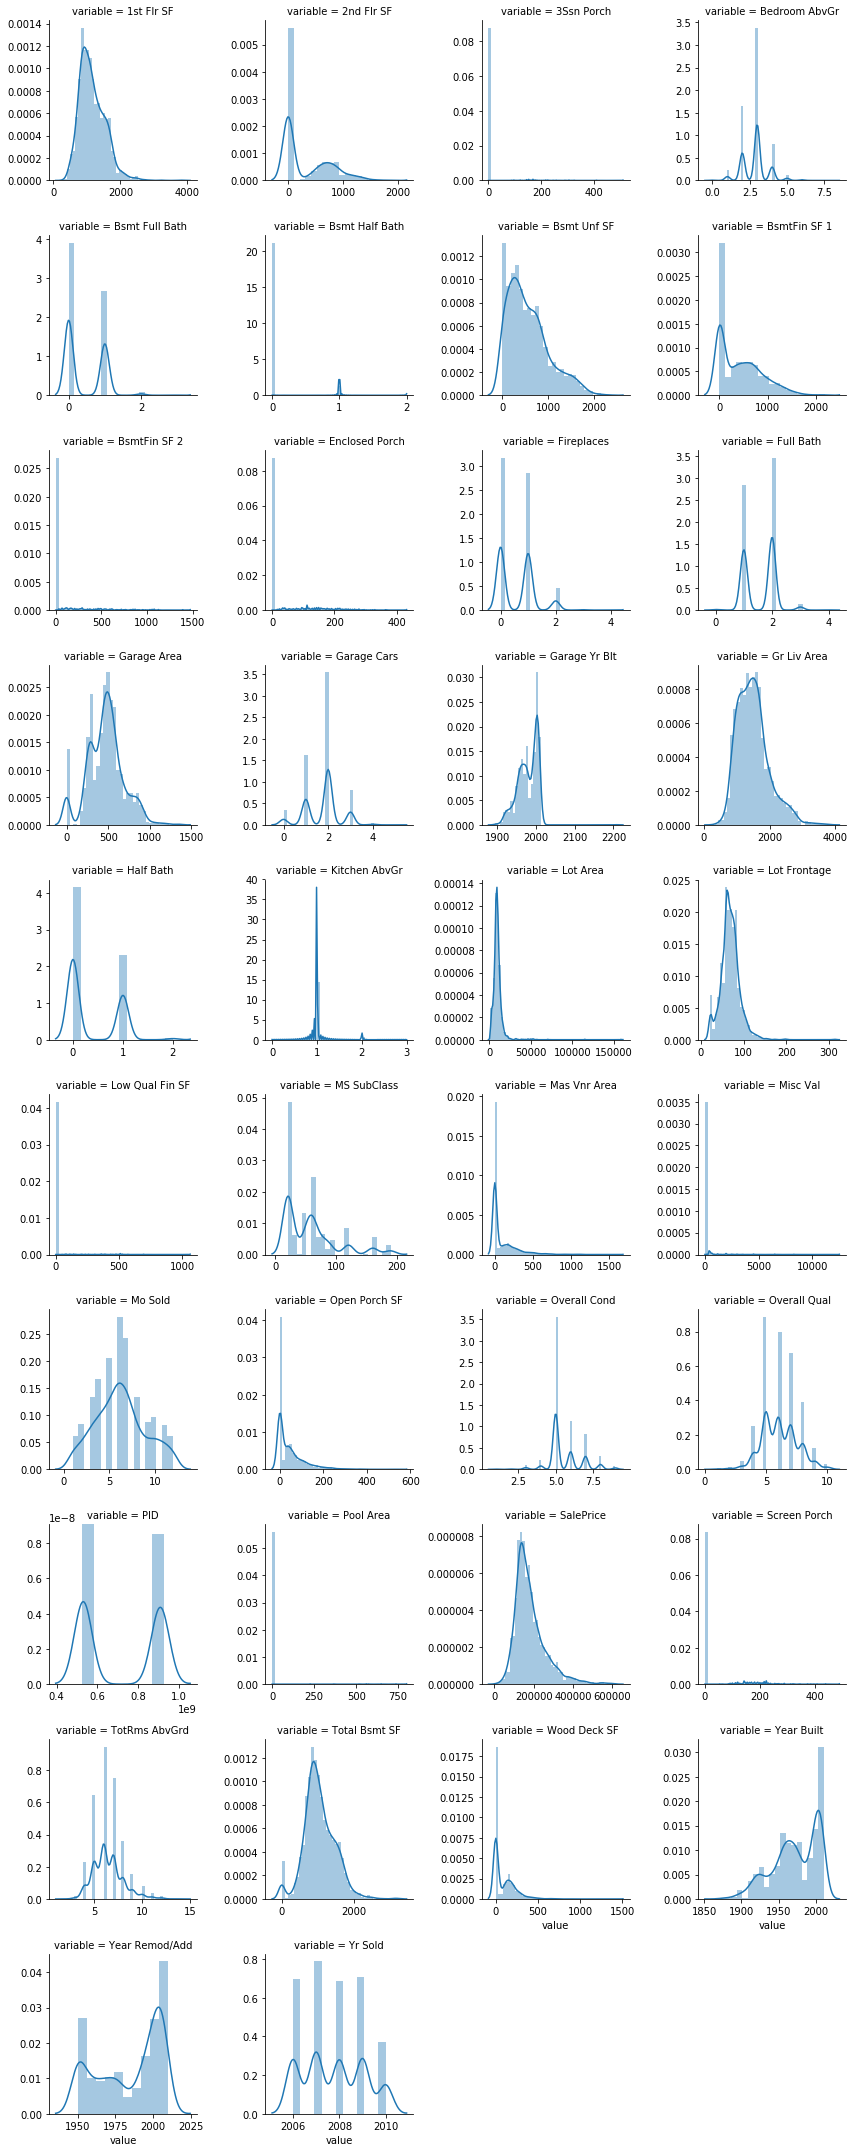

In [8]:
#plots of numerical features
f = pd.melt(train, value_vars=sorted(numerical))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')
g

Based on the plots above, 1st Flr SF, Garage Area, Gr live Area, Lot Area, Lot Frontage and Total Bsmt SF have the similar shapes as SalePrice.

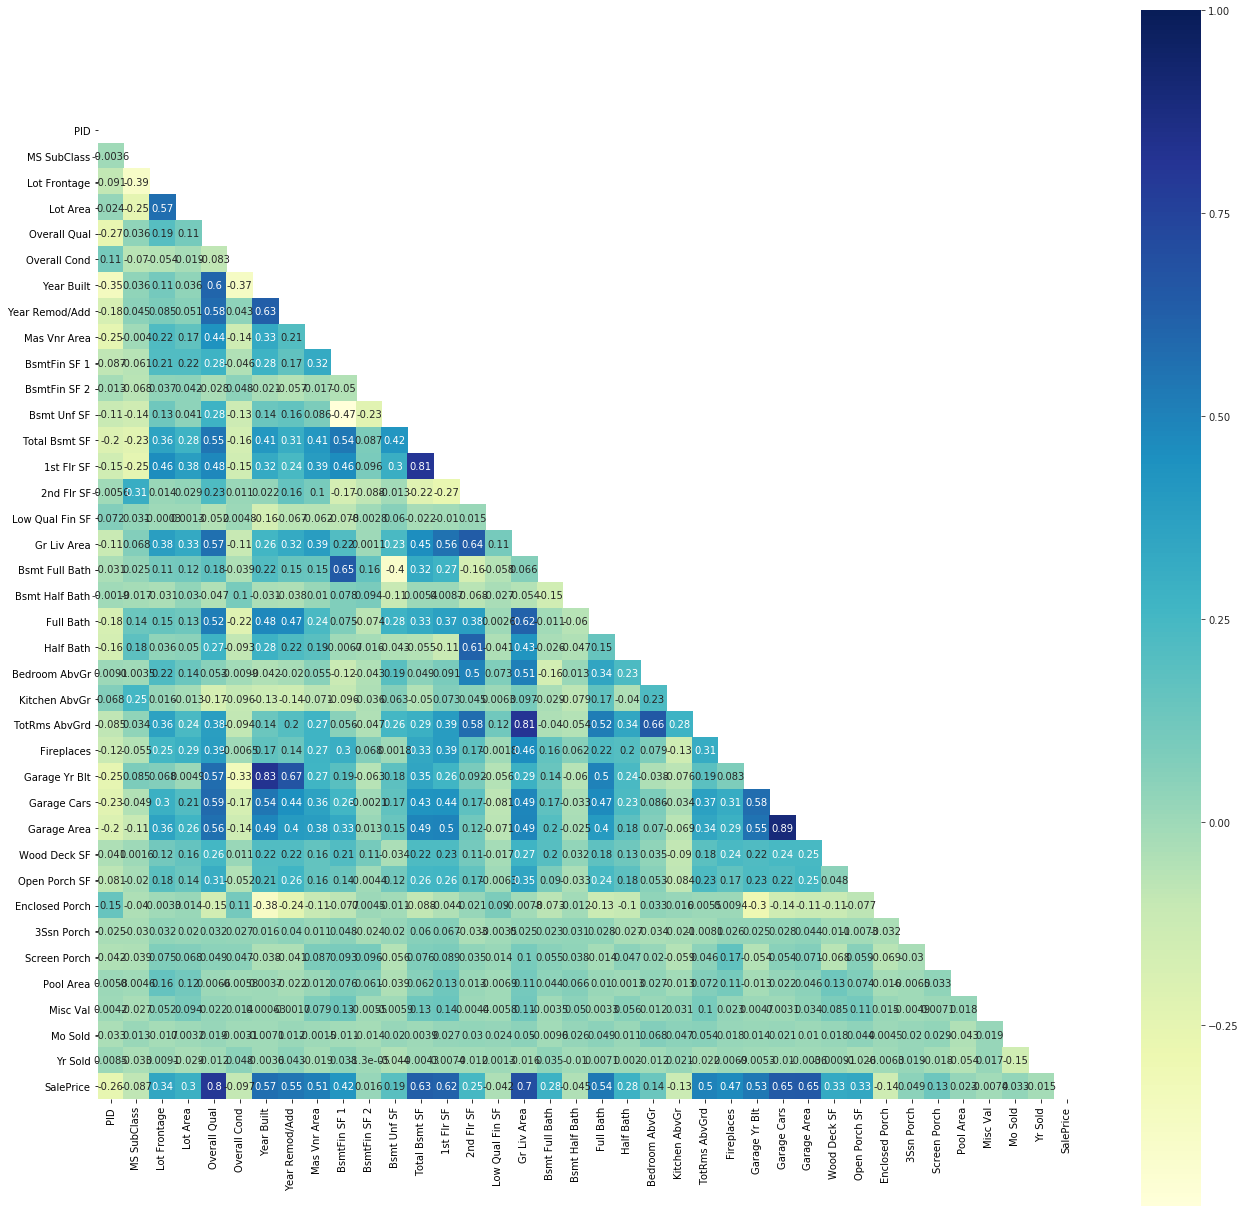

In [9]:
#heatmap for numerical features
fig, ax = plt.subplots(figsize=(22,22))
mask = np.zeros_like(numerical.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(numerical.corr(), mask=mask, square=True,annot = True,cmap="YlGnBu")


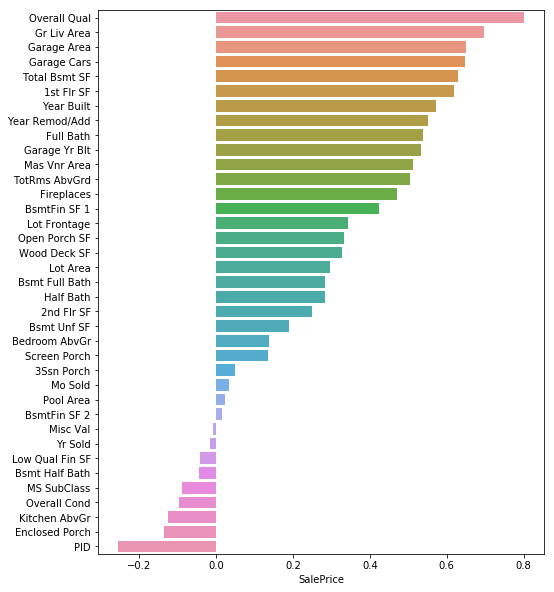

In [10]:
#barplot of numerical features vs saleprice
corr = numerical.corr().sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot(corr.SalePrice[1:], corr.index[1:])
plt.show()


In [11]:
corr.SalePrice[1:].abs().sort_values(ascending=False).head(15)

Overall Qual      0.800207
Gr Liv Area       0.697038
Garage Area       0.650270
Garage Cars       0.648220
Total Bsmt SF     0.628925
1st Flr SF        0.618486
Year Built        0.571849
Year Remod/Add    0.550370
Full Bath         0.537969
Garage Yr Blt     0.533922
Mas Vnr Area      0.512230
TotRms AbvGrd     0.504014
Fireplaces        0.471093
BsmtFin SF 1      0.423519
Lot Frontage      0.341842
Name: SalePrice, dtype: float64

Overall Qual has the strongest correlation with SalePrice. 

Gr Liv Area, Garage Area, Garage Cars, Total Bsmt SF, 1st Flr SF, Year Built, Year Remod/Add, Full Bath, Garage Yr Blt, Mas Vnr Area, TotRms AbvGrd have moderate correlation with SalePrice.

In [12]:
#high correlations between numerical features 
corr1 = numerical.corr().abs().unstack().sort_values(ascending=False)
corr1[corr1 != 1][corr1>=0.8]

Garage Area    Garage Cars      0.893180
Garage Cars    Garage Area      0.893180
Garage Yr Blt  Year Built       0.825316
Year Built     Garage Yr Blt    0.825316
Gr Liv Area    TotRms AbvGrd    0.813333
TotRms AbvGrd  Gr Liv Area      0.813333
1st Flr SF     Total Bsmt SF    0.808756
Total Bsmt SF  1st Flr SF       0.808756
Overall Qual   SalePrice        0.800207
SalePrice      Overall Qual     0.800207
dtype: float64

Garage Area and Garage Cars have strong positive correlation 0.893180. We are going to drop Garage Cars since the values are discrete. 

Garage Yr Blt and Year Built have correlation 0.825316, we will choose Year Built over Garage Yr Blt because it is more related to house. 

1st Flr SF and Total Bsmt SF have high correlarion 0.808756, we are going to keep Total Bsmt SF due to high correlation with SalePrice.

Gr Liv Area and TotRms AbvGrd have correlation 0.813333. Gr Liv Area is the  above grade (ground) living area square feet, and TotRms AbvGrd is total number of rooms above groud. So we are going to drop TotRms AbvGrd.

## Categorical Features 

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


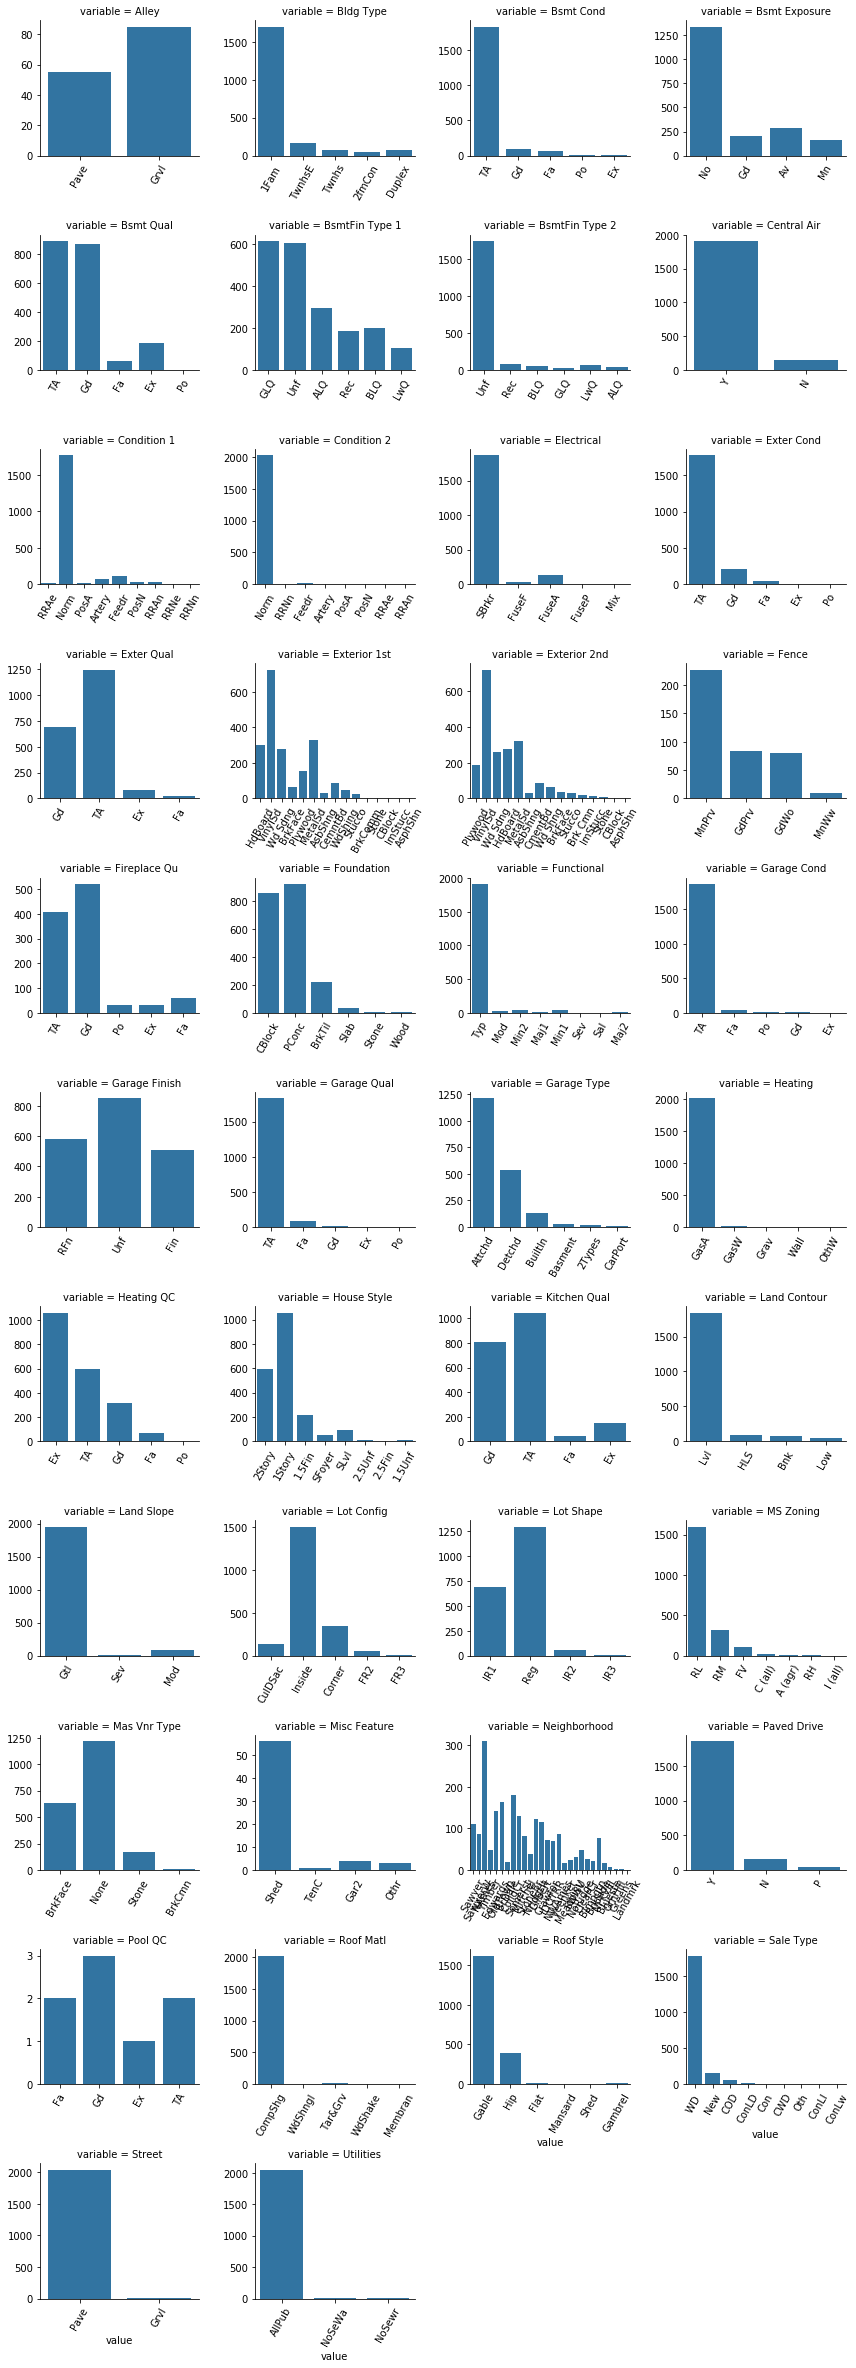

In [13]:
#plots of categorical features 
f = pd.melt(train, value_vars=sorted(categorical))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()


Some of categorical features have high frequencies for certain classes. For example, most samples have TA for variables Garage Cond.

There are two types of categorical features, ordinal and nominal. We are going to transform ordinal feature to numerical features. The features are Lot Shape, Utilities, Land Slope, Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFinType 2, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, Garage Finish, Garage Qual, Garage Cond, Paved Drive, Pool QC and Fence.

In [14]:
#change ordinal features to numerical
ord_features = ['Lot Shape','Utilities','Land Slope','Exter Qual','Exter Cond','Bsmt Qual', 'Bsmt Cond', 
                'Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2','Heating QC','Electrical', 'Kitchen Qual',
                'Functional','Fireplace Qu','Garage Finish', 'Garage Qual','Garage Cond', 'Paved Drive', 'Pool QC', 
                'Fence']

#change ordinal features to numerical
train['Lot Shape'].replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)
train['Utilities'].replace({'AllPub':1, 'NoSewr':2, 'NoSeWa':3, 'ELO':4}, inplace=True)
train['Land Slope'].replace({'Gtl':1, 'Mod':2, 'Sev':3}, inplace=True)
train['Exter Qual'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5}, inplace=True)
train['Exter Cond'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5}, inplace=True)
train['Bsmt Qual'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6}, inplace=True)
train['Bsmt Cond'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6}, inplace=True)
train['Bsmt Exposure'].replace({'Gd':1, 'Av':2, 'Mn':3, 'No':4, 'NA':5}, inplace=True)
train['BsmtFin Type 1'].replace({'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5, 'Unf':6, 'NA':7}, inplace=True)
train['BsmtFin Type 2'].replace({'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5, 'Unf':6, 'NA':7}, inplace=True)
train['Heating QC'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5}, inplace=True)
train['Electrical'].replace({'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix':5}, inplace=True)
train['Kitchen Qual'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6}, inplace=True)
train['Functional'].replace({'Typ':1, 'Min1':2, 'Min2':3, 'Mod':4, 'Maj1':5, 'Maj2':6, 'Sev':7, 'Sal':8},
                            inplace=True)
train['Fireplace Qu'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6}, inplace=True)
train['Garage Finish'].replace({'Fin':1, 'RFn':2, 'Unf':3, 'NA':4}, inplace=True)
train['Garage Qual'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6}, inplace=True)
train['Garage Cond'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6}, inplace=True)
train['Garage Qual'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6}, inplace=True)
train['Paved Drive'].replace({'Y':1, 'P':2, 'N':3}, inplace=True)
train['Pool QC'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'NA':5}, inplace=True)
train['Fence'].replace({'GdPrv':1, 'MnPrv':2, 'GdWo':3, 'MnWw':4, 'NA':5}, inplace=True)

#fill in 0 for missing values
train[ord_features] = train[ord_features].fillna(0)

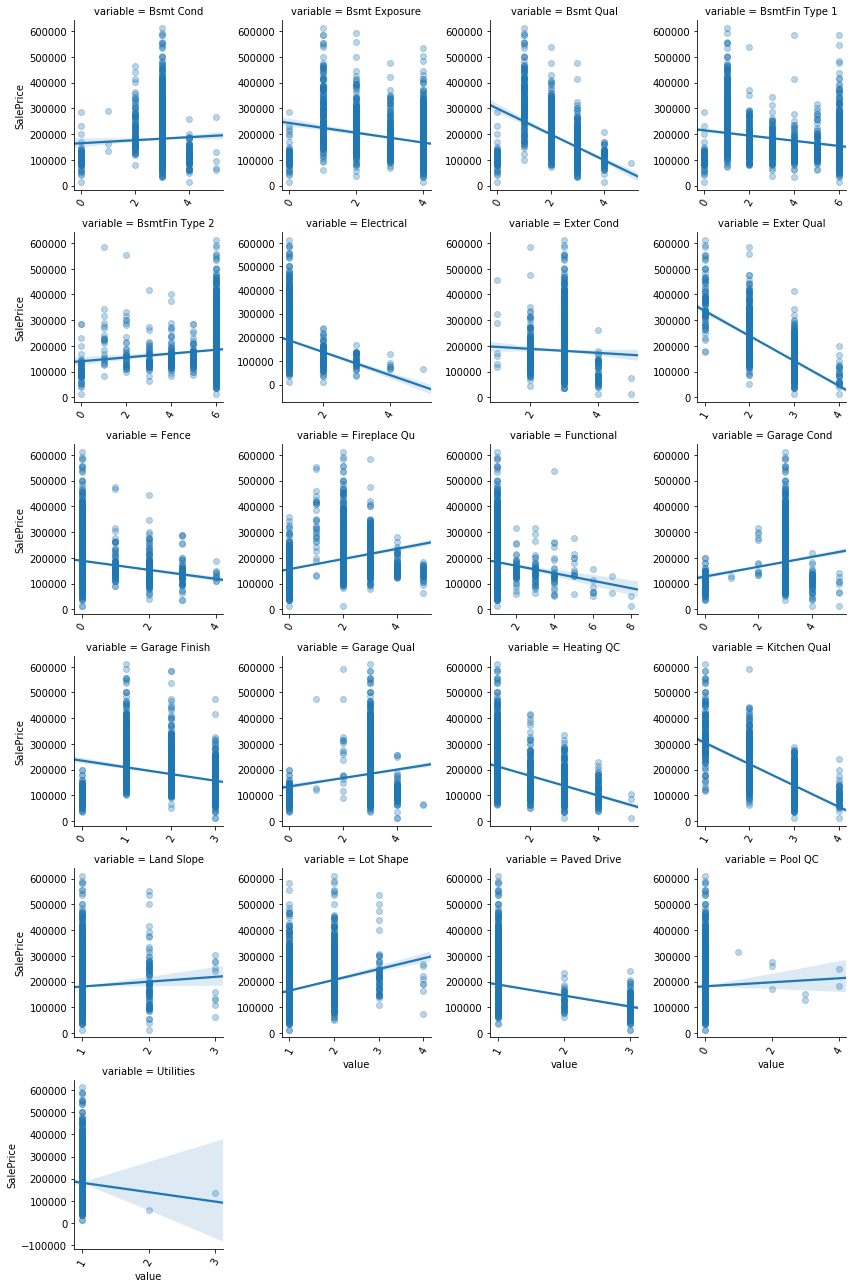

In [15]:
#plot graphs VS SalePrice
f = pd.melt(train, id_vars=['SalePrice'], value_vars=sorted(ord_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

There are strong correltions between SalePrice and some features, like Exter Qual, Bsmt Qual, Kitchen Qual and Heating QC.

In [16]:
#form a new numreical features
numerical_feature = list(numerical.columns) + ord_features
len(numerical_feature)

59

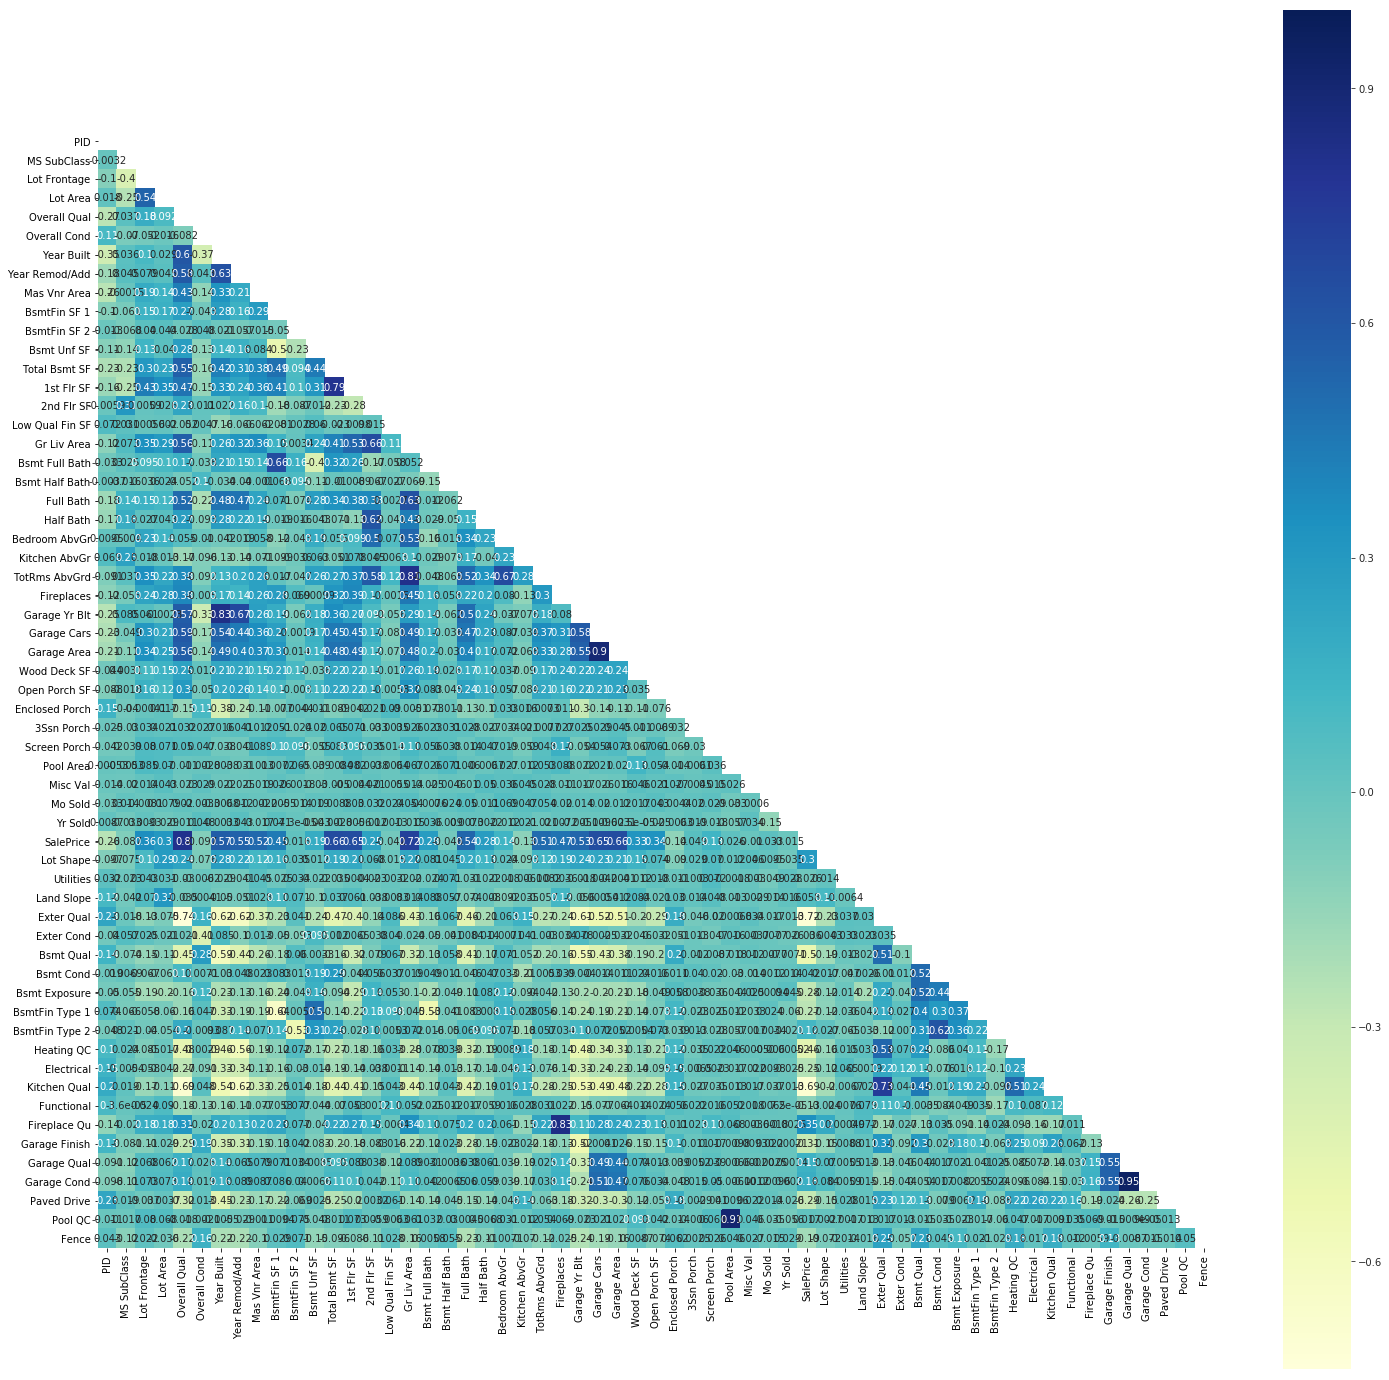

In [17]:
#now we have 59 numerical features
#plot heatmap
fig, ax = plt.subplots(figsize=(25,25))
mask = np.zeros_like(train[numerical_feature].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(train[numerical_feature].corr(), mask=mask, square=True,annot = True,cmap="YlGnBu")

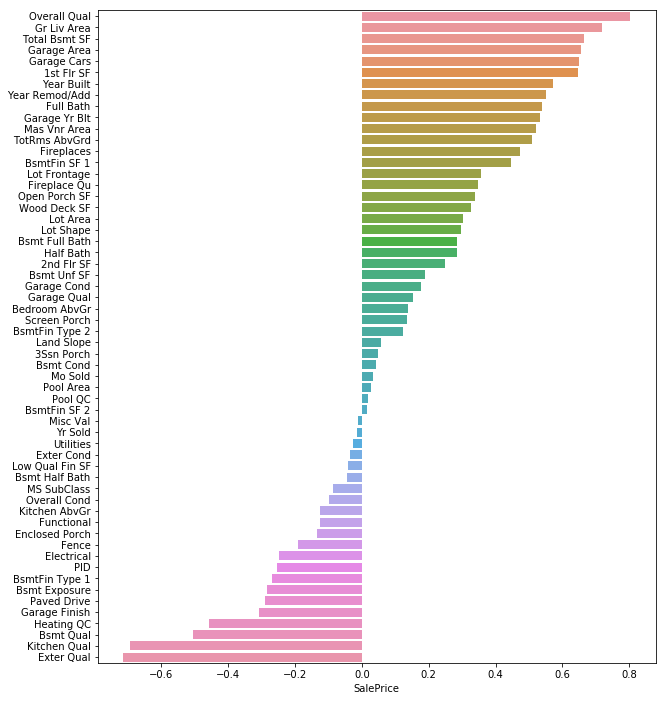

In [18]:
corr = train[numerical_feature].corr().sort_values('SalePrice', ascending=False)
plt.figure(figsize=(10,12))
sns.barplot(corr.SalePrice[1:], corr.index[1:])
plt.show()

In [19]:
corr.SalePrice[1:].abs().sort_values(ascending=False).head(20)

Overall Qual      0.803462
Gr Liv Area       0.719463
Exter Qual        0.715048
Kitchen Qual      0.694295
Total Bsmt SF     0.664819
Garage Area       0.655483
Garage Cars       0.648667
1st Flr SF        0.648252
Year Built        0.572405
Year Remod/Add    0.550872
Full Bath         0.538225
Garage Yr Blt     0.534514
Mas Vnr Area      0.520023
TotRms AbvGrd     0.509775
Bsmt Qual         0.504382
Fireplaces        0.473783
Heating QC        0.458636
BsmtFin SF 1      0.445764
Lot Frontage      0.355530
Fireplace Qu      0.347201
Name: SalePrice, dtype: float64

In [20]:
corr1 = train[numerical_feature].corr().abs().unstack().sort_values(ascending=False)
corr1[corr1 != 1][corr1>=0.8]

Garage Qual    Garage Cond      0.952174
Garage Cond    Garage Qual      0.952174
Pool QC        Pool Area        0.911638
Pool Area      Pool QC          0.911638
Garage Cars    Garage Area      0.897057
Garage Area    Garage Cars      0.897057
Fireplaces     Fireplace Qu     0.831596
Fireplace Qu   Fireplaces       0.831596
Garage Yr Blt  Year Built       0.825070
Year Built     Garage Yr Blt    0.825070
Gr Liv Area    TotRms AbvGrd    0.812129
TotRms AbvGrd  Gr Liv Area      0.812129
SalePrice      Overall Qual     0.803462
Overall Qual   SalePrice        0.803462
dtype: float64

## Nominal Categorical Features 

In [21]:
nom_features = np.setdiff1d(list(categorical.columns), ord_features)
nom_features

array(['Alley', 'Bldg Type', 'Central Air', 'Condition 1', 'Condition 2',
       'Exterior 1st', 'Exterior 2nd', 'Foundation', 'Garage Type',
       'Heating', 'House Style', 'Land Contour', 'Lot Config',
       'MS Zoning', 'Mas Vnr Type', 'Misc Feature', 'Neighborhood',
       'Roof Matl', 'Roof Style', 'Sale Type', 'Street'], dtype='<U14')

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


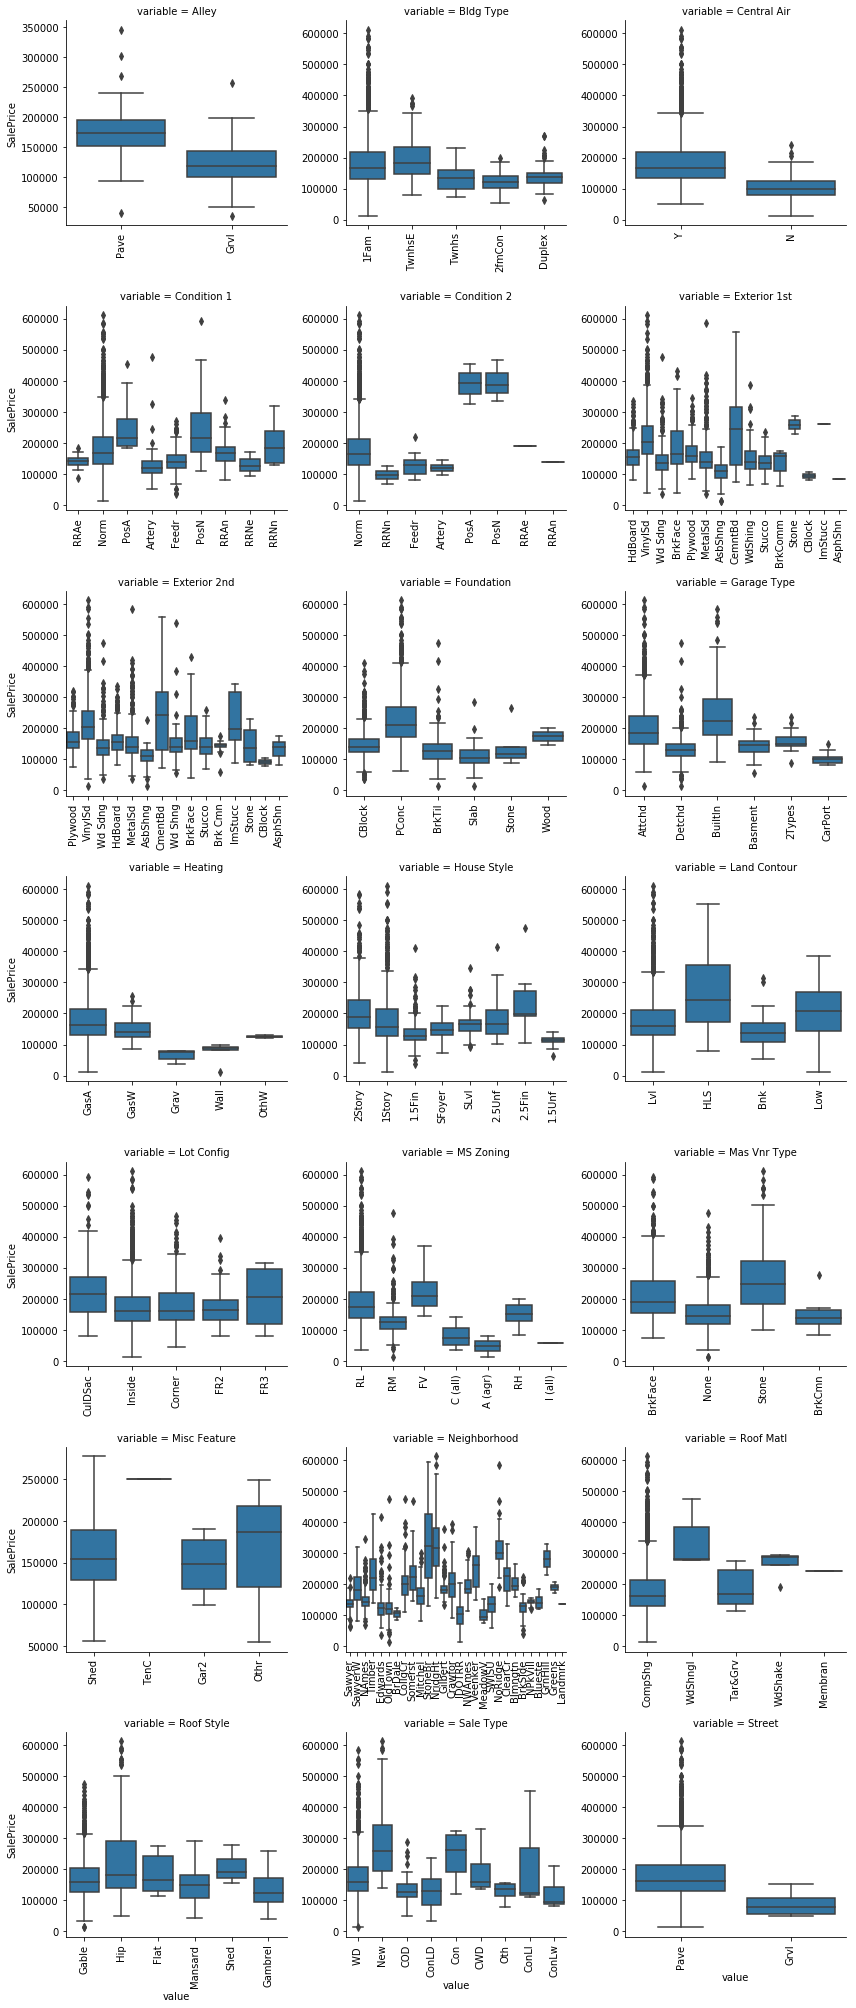

In [22]:
#boxplots for categorical feature
f = pd.melt(train, id_vars=['SalePrice'], value_vars=sorted(nom_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

For some features, the medians of boxplots are quite different from each other, like Neighborhood. The lowest median is around 100000, and the highest median is above 300000. It indicates different neighborhood may influence the SalePrice.

## Missing Values

We are going to process the missing values in dataset. For ordinal features, we have changed all missing values to 0. Now are are going to fill in None for nominal categorical features and fill in differnet values for numerical features depend on their actual meaning.

In [23]:
# fill in None for nominal categorical features
train[nom_features] = train[nom_features].fillna('None')
train[nom_features].isnull().sum()

Alley           0
Bldg Type       0
Central Air     0
Condition 1     0
Condition 2     0
Exterior 1st    0
Exterior 2nd    0
Foundation      0
Garage Type     0
Heating         0
House Style     0
Land Contour    0
Lot Config      0
MS Zoning       0
Mas Vnr Type    0
Misc Feature    0
Neighborhood    0
Roof Matl       0
Roof Style      0
Sale Type       0
Street          0
dtype: int64

In [24]:
#fill in median for numerical features
numerical.isnull().sum()

PID                  0
MS SubClass          0
Lot Frontage       330
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [25]:
#Lot Frontage
#fill in missing values with median in that neighborhood
train['Lot Frontage'] = train.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

train['Lot Frontage'] = train['Lot Frontage'].fillna(0)
train['Lot Frontage'].isnull().sum()

0

In [26]:
#Mas Vnr Area means Masonry veneer area in square feet
#for those rows that have missing values, let's take a look of their Mas Vnr Type
train[train['Mas Vnr Area'].isnull()]['Mas Vnr Type']

22      None
41      None
86      None
212     None
276     None
338     None
431     None
451     None
591     None
844     None
913     None
939     None
1025    None
1244    None
1306    None
1430    None
1434    None
1606    None
1699    None
1815    None
1820    None
1941    None
Name: Mas Vnr Type, dtype: object

In [27]:
#Since there are all None, we are going to fill in the missing values with 0
train['Mas Vnr Area'] = train['Mas Vnr Area'].fillna(0)

In [28]:
#Bsmt
train[train['BsmtFin SF 1'].isnull()][['Bsmt Qual','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF',
                                       'SalePrice']]


,Bsmt Qual,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,SalePrice
1327,0,NaN,NaN,NaN,NaN,79000


In [29]:
#the missing values are in one row. We are going to fill in 0
train['BsmtFin SF 1'] = train['BsmtFin SF 1'].fillna(0)
train['BsmtFin SF 2'] = train['BsmtFin SF 2'].fillna(0)
train['Bsmt Unf SF'] = train['Bsmt Unf SF'].fillna(0)
train['Total Bsmt SF'] = train['Total Bsmt SF'].fillna(0)

In [30]:
#Bsmt Full Bath and Bsmt Half Bath
train[train['Bsmt Full Bath'].isnull()][['Bsmt Qual','Bsmt Full Bath','Bsmt Full Bath',
                                       'SalePrice']]

,Bsmt Qual,Bsmt Full Bath,Bsmt Full Bath,SalePrice
616,0,NaN,NaN,284700
1327,0,NaN,NaN,79000


In [31]:
#fill in 0
train['Bsmt Full Bath'] = train['Bsmt Full Bath'].fillna(0)
train['Bsmt Half Bath'] = train['Bsmt Half Bath'].fillna(0)

In [32]:
#Garage Yr Blt
train[train['Garage Yr Blt'].isnull()][['Garage Type','Garage Yr Blt',
                                       'SalePrice']]


,Garage Type,Garage Yr Blt,SalePrice
28,None,NaN,119600
53,None,NaN,76000
65,None,NaN,147000
79,None,NaN,129850
101,None,NaN,86000
103,None,NaN,44000
114,None,NaN,63900
120,None,NaN,108000
134,None,NaN,98000
136,None,NaN,94000


In [33]:
#The values are missing because they don't have garage, so fill in with 0
train['Garage Yr Blt'] = train['Garage Yr Blt'].fillna(0)

In [34]:
#Garage Cars and Garage Area
train[train['Garage Area'].isnull()][['Garage Type','Garage Cars','Garage Area','SalePrice']]

,Garage Type,Garage Cars,Garage Area,SalePrice
1712,Detchd,NaN,NaN,150909


In [35]:
#fill in Garage Area with the median of detchd type of basement
train['Garage Area'] = train['Garage Area'].fillna(train[train['Garage Type'] == 'Detchd']['Garage Area'].median())
#fill in Garage Cars 
train['Garage Cars'] = train['Garage Cars'].fillna((train[train['Garage Type'] == 'Detchd']['Garage Cars'].median()))


In [36]:
#check for missing values in dataset
train.isnull().sum().sum()

0

## Feature Enginnering 

In [37]:
#We are going to add some extra features

#total area: basement + living area above groud 
train['Total_Area'] = train['Total Bsmt SF'] + train['Gr Liv Area']

#total bathroom
train['Total_Bathroom'] = train['Bsmt Full Bath'] + 0.5*train['Bsmt Half Bath'] + train['Full Bath'] \
                                + 0.5*train['Half Bath']
#house age
train['House_age'] = train['Yr Sold'] - train['Year Built']

new_features = ['Total_Area','Total_Bathroom','House_age']


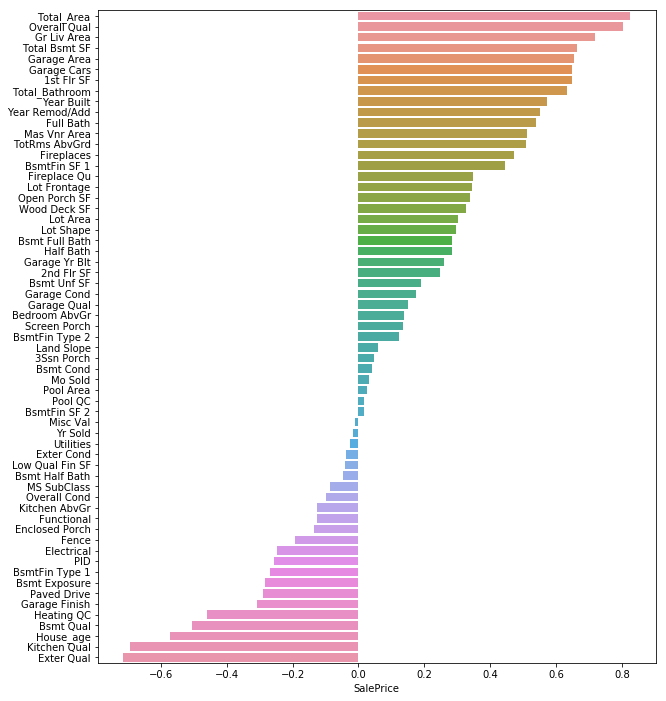

In [38]:
corr = train.corr().sort_values('SalePrice', ascending=False)
plt.figure(figsize=(10,12))
sns.barplot(corr.SalePrice[1:], corr.index[1:])
plt.show()

In [39]:
corr.SalePrice[1:].abs().sort_values(ascending=False).head(20)

Total_Area        0.825818
Overall Qual      0.803462
Gr Liv Area       0.719463
Exter Qual        0.715048
Kitchen Qual      0.694295
Total Bsmt SF     0.665116
Garage Area       0.655504
Garage Cars       0.648574
1st Flr SF        0.648252
Total_Bathroom    0.632542
House_age         0.572441
Year Built        0.572405
Year Remod/Add    0.550872
Full Bath         0.538225
Mas Vnr Area      0.511273
TotRms AbvGrd     0.509775
Bsmt Qual         0.504382
Fireplaces        0.473783
Heating QC        0.458636
BsmtFin SF 1      0.446103
Name: SalePrice, dtype: float64

Total_Area has the highest correlation with SalePrice. 

In [40]:
corr1 = train.corr().abs().unstack().sort_values(ascending=False)
corr1[corr1 != 1][corr1>=0.8]

House_age      Year Built       0.999055
Year Built     House_age        0.999055
Garage Cond    Garage Qual      0.952174
Garage Qual    Garage Cond      0.952174
Garage Cond    Garage Yr Blt    0.948398
Garage Yr Blt  Garage Cond      0.948398
               Garage Qual      0.937976
Garage Qual    Garage Yr Blt    0.937976
Pool QC        Pool Area        0.911638
Pool Area      Pool QC          0.911638
Garage Area    Garage Cars      0.896964
Garage Cars    Garage Area      0.896964
Gr Liv Area    Total_Area       0.861643
Total_Area     Gr Liv Area      0.861643
Fireplaces     Fireplace Qu     0.831596
Fireplace Qu   Fireplaces       0.831596
Total_Area     SalePrice        0.825818
SalePrice      Total_Area       0.825818
Total_Area     Total Bsmt SF    0.816296
Total Bsmt SF  Total_Area       0.816296
TotRms AbvGrd  Gr Liv Area      0.812129
Gr Liv Area    TotRms AbvGrd    0.812129
Overall Qual   SalePrice        0.803462
SalePrice      Overall Qual     0.803462
dtype: float64

In [41]:
#run anova test
#nominal features 
anova = {'feature':[], 'f':[], 'p':[]}
for i in nom_features:
    group_prices = []
    for group in train[i].unique():
        group_prices.append(train[train[i] == group]['SalePrice'].values)
    f, p = scipy.stats.f_oneway(*group_prices)
    anova['feature'].append(i)
    anova['f'].append(f)
    anova['p'].append(p)
    
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p', inplace=True)
anova   


,feature,f,p
16,Neighborhood,102.886815,0.000000e+00
7,Foundation,165.996165,2.167424e-148
8,Garage Type,118.657870,8.278394e-129
14,Mas Vnr Type,174.559750,9.300624e-101
5,Exterior 1st,34.618821,3.272425e-84
6,Exterior 2nd,31.322936,2.952251e-76
19,Sale Type,43.075871,3.936622e-64
13,MS Zoning,42.445621,5.004963e-49
2,Central Air,170.682865,1.591151e-37
18,Roof Style,32.039385,1.591081e-31


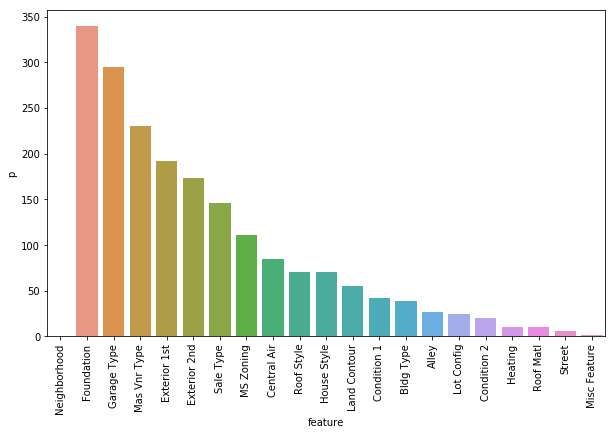

In [42]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(anova.feature, np.log(1./anova['p']))
plt.xticks(rotation=90)
plt.show()

In [90]:
#we are going to select Total_Area, Overall Qual, Exter Qual, Kitchen Qual, Garage Area, Total_Bathroom
#Year Remod/Add, Mas Vnr Area, Bsmt Qual, Neighborhood, Foundation, Garage Type, 
features = ['Total_Area', 'Overall Qual', 'Exter Qual', 'Kitchen Qual', 'Garage Area', 'Total_Bathroom',
           'Year Remod/Add', 'Mas Vnr Area', 'Bsmt Qual', 'Fireplaces','Heating QC', 'Neighborhood', 'Foundation', 
           'Garage Type']
X = train[features]
y = np.log(train['SalePrice'])
X.shape

(2049, 14)

## Pre-processing

In [91]:
#get dummies 
X_with_dummies = pd.get_dummies(X, columns=['Neighborhood', 'Foundation', 
           'Garage Type'], drop_first=True)


In [92]:
X_with_dummies.shape


(2049, 49)

In [93]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_with_dummies, y, random_state=42)

In [94]:
#scaling
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


## Modeling

In [95]:
#linear model 
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [96]:
lr.score(X_test, y_test)

0.865363153513831

In [97]:
#Print out the beta coefficient and intercept for the model.
print(model.coef_)
print(model.intercept_)

[ 0.13568147  0.10631034 -0.00665827 -0.02599622  0.03260841  0.04203956
  0.03418512  0.00312652 -0.02602359  0.03217862 -0.02794269 -0.00258741
 -0.00774962  0.01800722  0.01743014  0.01802624  0.0346264   0.01205315
  0.01661833  0.00092521  0.01284338 -0.0152429  -0.00049407 -0.00752476
  0.02053178  0.03315056 -0.00343038  0.01110346  0.01481497  0.02369744
 -0.00177133  0.00776807  0.02116925  0.0107793   0.01365544  0.01848201
  0.012963    0.00442812  0.0252514   0.01277139 -0.00847902  0.00383961
  0.00347086  0.03738551  0.00410996  0.02205393  0.00202778  0.02797489
 -0.00397033]
12.02443339315296


In [99]:
y_pred = np.exp(model.predict(X_test))
print('error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

error: 196486.01725648605


In [102]:
#ridge
# create an array of alpha values
alphas=np.linspace(.001, 100, 1000)
print('mina alpha: {}'.format(min(alphas)))
print('max alpha: {}'.format(max(alphas)))

# select the best alpha with RidgeCV
ridgeregcv = RidgeCV(alphas=alphas, normalize=True, scoring='r2')
ridgeregcv.fit(X_train, y_train)
print('best alpha: {}'.format(ridgeregcv.alpha_))

# predict method uses the best alpha value
y_pred = np.exp(ridgeregcv.predict(X_test))
print('best error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

mina alpha: 0.001
max alpha: 100.0
best alpha: 0.001
best error: 196463.88084089165


Compare RMSE to linear regression, ridge has improved the model. Also, the best alpha value is very small, it shows lasso may not be a good regularization to improve our model.

In [101]:
ridgeregcv.fit(X_train, y_train).coef_
m = []
for col, coef in zip(X_with_dummies.columns, ridgeregcv.fit(X_train, y_train).coef_):
        if coef != 0.0:
            print(col, coef)
            m.append(col)


Total_Area 0.13543620128143882
Overall Qual 0.10609999089840196
Exter Qual -0.006712437847707085
Kitchen Qual -0.02603334722066226
Garage Area 0.03254474835002143
Total_Bathroom 0.042124027416771084
Year Remod/Add 0.03414039673008966
Mas Vnr Area 0.00324500854340299
Bsmt Qual -0.0259320863202116
Fireplaces 0.032217405126965866
Heating QC -0.027896413384228408
Neighborhood_Blueste -0.002887178988925651
Neighborhood_BrDale -0.008275133060796979
Neighborhood_BrkSide 0.01692495351148638
Neighborhood_ClearCr 0.01679043190531333
Neighborhood_CollgCr 0.01661109303900239
Neighborhood_Crawfor 0.03357779749182917
Neighborhood_Edwards 0.010620193785106086
Neighborhood_Gilbert 0.015372643744514266
Neighborhood_Greens 0.0007388769773141969
Neighborhood_GrnHill 0.01269675636143722
Neighborhood_IDOTRR -0.01627952843577315
Neighborhood_Landmrk -0.0006265293582449403
Neighborhood_MeadowV -0.008077251532452135
Neighborhood_Mitchel 0.019391208455691495
Neighborhood_NAmes 0.031158740243697674
Neighborhood

In [104]:
#lasso
# select the best alpha with LassoCV
lassoregcv = LassoCV(n_alphas=300, normalize=True, random_state=1, max_iter=10000)
lassoregcv.fit(X_train, y_train)
print('best alpha: {}'.format(lassoregcv.alpha_))

# predict method uses the best alpha value
y_pred = np.exp(lassoregcv.predict(X_test))
print('best error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

best alpha: 7.248741053889141e-05
best error: 195509.02578261122


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Lasso has the lowest RMSE score witch means it preform the best.

In [117]:
lasso1 = Lasso(alpha = 7.248741053889141e-05,normalize = True)
lasso1.fit(X_train, y_train)
y_pred = np.exp(lasso1.predict(X_test))
print('best error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

best error: 195509.02578261122


In [109]:
lassoregcv.fit(X_train, y_train).coef_
l = []
for col, coef in zip(X_with_dummies.columns, lassoregcv.fit(X_train, y_train).coef_):
        if coef != 0.0:
            print(col, coef)
            l.append(col)
len(l)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Total_Area 0.1376479109120683
Overall Qual 0.10595241796328818
Exter Qual -0.006334430300686009
Kitchen Qual -0.026168291994996956
Garage Area 0.031981865811061536
Total_Bathroom 0.041063594448579016
Year Remod/Add 0.03312687796837868
Mas Vnr Area 0.003166507480272735
Bsmt Qual -0.020383476289589482
Fireplaces 0.031802766749070475
Heating QC -0.027396136092227595
Neighborhood_Blueste -0.0031649127592313898
Neighborhood_BrDale -0.011135502493681707
Neighborhood_ClearCr 0.0068605624724903105
Neighborhood_Crawfor 0.017388299379782705
Neighborhood_Edwards -0.004614819633215288
Neighborhood_GrnHill 0.008282089696240164
Neighborhood_IDOTRR -0.02814516994304081
Neighborhood_MeadowV -0.011387511320920425
Neighborhood_Mitchel 0.0037975020319669143
Neighborhood_NAmes 0.005688451916774466
Neighborhood_NPkVill -0.006603519681627985
Neighborhood_NoRidge 0.002179625184809248
Neighborhood_NridgHt 0.006330631921931598
Neighborhood_OldTown -0.023717259724994052
Neighborhood_SWISU -0.0003522143607916946

35

## Test data

Transform test dataset to the same format and shape as train dataset.

In [57]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [58]:
test.isnull().sum()
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

In [59]:
#Id is just a observation number, so we are going to exclude it.
test = test.loc[:,test.columns != 'Id']
#Separate numerical and categorical data
numerical_test= test.select_dtypes(exclude=['object'])
categorical_test= test.select_dtypes('object')

In [60]:
#change ordinal features to numerical
ord_features = ['Lot Shape','Utilities','Land Slope','Exter Qual','Exter Cond','Bsmt Qual', 'Bsmt Cond', 
                'Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2','Heating QC','Electrical', 'Kitchen Qual',
                'Functional','Fireplace Qu','Garage Finish', 'Garage Qual','Garage Cond', 'Paved Drive', 'Pool QC', 
                'Fence']

In [61]:
#change ordinal features to numerical
test['Lot Shape'].replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)
test['Utilities'].replace({'AllPub':1, 'NoSewr':2, 'NoSeWa':3, 'ELO':4}, inplace=True)
test['Land Slope'].replace({'Gtl':1, 'Mod':2, 'Sev':3}, inplace=True)
test['Exter Qual'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5}, inplace=True)
test['Exter Cond'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5}, inplace=True)
test['Bsmt Qual'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6}, inplace=True)
test['Bsmt Cond'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6}, inplace=True)
test['Bsmt Exposure'].replace({'Gd':1, 'Av':2, 'Mn':3, 'No':4, 'NA':5}, inplace=True)
test['BsmtFin Type 1'].replace({'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5, 'Unf':6, 'NA':7}, inplace=True)
test['BsmtFin Type 2'].replace({'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5, 'Unf':6, 'NA':7}, inplace=True)
test['Heating QC'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5}, inplace=True)
test['Electrical'].replace({'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix':5}, inplace=True)
test['Kitchen Qual'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6}, inplace=True)
test['Functional'].replace({'Typ':1, 'Min1':2, 'Min2':3, 'Mod':4, 'Maj1':5, 'Maj2':6, 'Sev':7, 'Sal':8},
                            inplace=True)
test['Fireplace Qu'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6}, inplace=True)
test['Garage Finish'].replace({'Fin':1, 'RFn':2, 'Unf':3, 'NA':4}, inplace=True)
test['Garage Qual'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6}, inplace=True)
test['Garage Cond'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6}, inplace=True)
test['Garage Qual'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6}, inplace=True)
test['Paved Drive'].replace({'Y':1, 'P':2, 'N':3}, inplace=True)
test['Pool QC'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'NA':5}, inplace=True)
test['Fence'].replace({'GdPrv':1, 'MnPrv':2, 'GdWo':3, 'MnWw':4, 'NA':5}, inplace=True)

#fill in 0 for missing values
test[ord_features] = test[ord_features].fillna(0)


In [62]:
#form a new numreical features
numerical_feature_test = list(numerical_test.columns) + ord_features
nom_features = np.setdiff1d(list(categorical_test.columns), ord_features)

In [63]:
# fill in None for nominal categorical features
test[nom_features] = test[nom_features].fillna('None')

In [64]:
#fill in median for numerical features
numerical_test.isnull().sum()

PID                  0
MS SubClass          0
Lot Frontage       160
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area         1
BsmtFin SF 1         0
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       0
Bsmt Half Bath       0
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt       45
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
dtype: int64

In [65]:
#Lot Frontage
#fill in missing values with median in that neighborhood
test['Lot Frontage'] = test.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

In [66]:
#Since there are all None, we are going to fill in the missing values with 0
test['Mas Vnr Area'] = test['Mas Vnr Area'].fillna(0)

test['Garage Yr Blt'] = test['Garage Yr Blt'].fillna(0)


In [67]:
test.isnull().sum().sum()

0

In [68]:
#total area: basement + living area above groud 
test['Total_Area'] = test['Total Bsmt SF'] + test['Gr Liv Area']

#total bathroom
test['Total_Bathroom'] = test['Bsmt Full Bath'] + 0.5*test['Bsmt Half Bath'] + test['Full Bath'] \
                                + 0.5*test['Half Bath']
#house age
test['House_age'] = test['Yr Sold'] - test['Year Built']

In [69]:
features = ['Total_Area', 'Overall Qual', 'Exter Qual', 'Kitchen Qual', 'Garage Area', 'Total_Bathroom',
           'Year Remod/Add', 'Mas Vnr Area', 'Bsmt Qual', 'Fireplaces','Heating QC', 'Neighborhood', 'Foundation', 
           'Garage Type']
X_t = test[features]

In [70]:
X_t_with_dummies = pd.get_dummies(X_t, columns=['Neighborhood', 'Foundation', 
           'Garage Type'], drop_first=True)

In [71]:
np.setdiff1d(list(X_with_dummies.columns),list(X_t_with_dummies.columns))


array(['Neighborhood_GrnHill', 'Neighborhood_Landmrk'], dtype='<U20')

In [72]:
X_t_with_dummies['Neighborhood_GrnHill']=0
X_t_with_dummies['Neighborhood_Landmrk']=0
X_t_with_dummies.shape

(879, 49)

In [73]:
cols = X_with_dummies.columns.tolist()
X_t_with_dummies = X_t_with_dummies[cols]

In [74]:
testfile = ss.transform(X_t_with_dummies)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [114]:
testfile 

array([[ 0.51712497, -0.06849398,  0.69620048, ..., -0.05714752,
         1.6711052 , -0.24353715],
       [ 1.80368592, -0.76522748,  0.69620048, ..., -0.05714752,
        -0.59840637, -0.24353715],
       [-0.52412822,  0.62823952, -1.01478182, ..., -0.05714752,
        -0.59840637, -0.24353715],
       ...,
       [-0.50716545, -0.76522748,  0.69620048, ..., -0.05714752,
        -0.59840637, -0.24353715],
       [-1.07476588, -1.46196098,  0.69620048, ..., -0.05714752,
         1.6711052 , -0.24353715],
       [-0.91818645, -0.76522748,  0.69620048, ..., -0.05714752,
        -0.59840637, -0.24353715]])

In [120]:
y_pred = np.exp(lasso1.predict(testfile))

In [121]:
pd.DataFrame(y_pred).to_csv('datasets/predict3.csv')

The RMSE score from Kaggle is 23786.92358.

## Business Recommendations

- Which features appear to add the most value to a home?
- Which features appear to hurt the most value to a home?

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

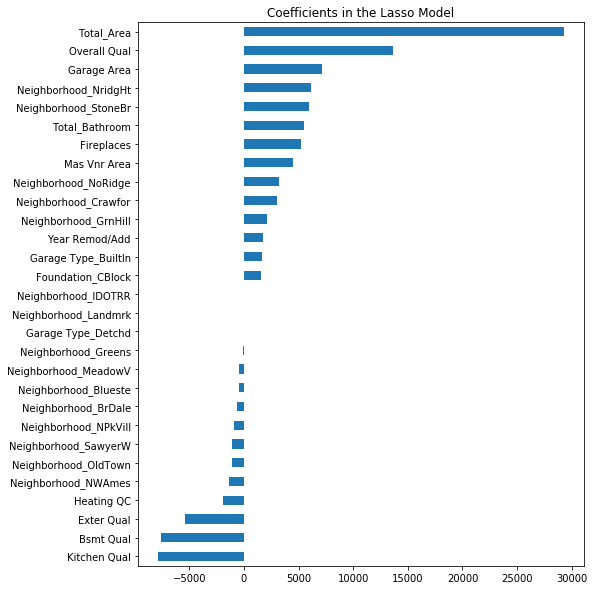

In [86]:
coef = pd.Series(lasso1.coef_, index = X_with_dummies.columns)
imp_coef = pd.concat([coef.sort_values().head(15), coef.sort_values().tail(1)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = 'barh')
plt.title('Coefficients in the Lasso Model')

Total_Area has the highest coefficient in lasso model. It adds most value to our prediction. Moreover, among all the features are chosen, one third of them are dummies of Neighborhood. It shows neighborhood has large contribution to our model.

- What are things that homeowners could improve in their homes to increase the value?

Base on the plot, we suggest to improve quality of house, espacialy kitchen and basement.

- What neighborhoods seem like they might be a good investment?

Northridge Heights and Stone Brook

- Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?

I don't think this model can apply to other cities since it highly depend on Neighborhood. 